<a href="https://colab.research.google.com/github/BBPLAYER1/-CSA-0480-operating-systems/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<!-- TODO(b/319266067) remove temporary advert after a few weeks. -->
<div class="markdown-google-sans">
  <h2>(New) Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  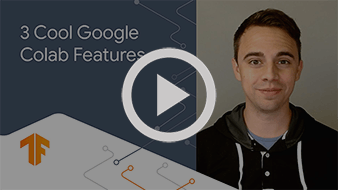
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [3]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [4]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

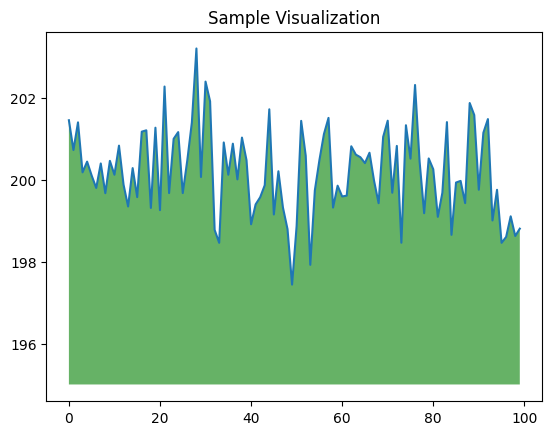

In [5]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load your time series data
# Assuming you have a CSV file with a 'date' and 'temperature' column
data = pd.read_csv('your_data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Preprocessing
# Assuming the temperature column is the target variable
target_col = 'temperature'

# Handling missing values
data[target_col] = data[target_col].interpolate()

# Feature scaling using Min-Max scaling
scaler = MinMaxScaler()
data[target_col] = scaler.fit_transform(data[target_col].values.reshape(-1, 1))

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# ARIMA Model
model_arima = ARIMA(train[target_col], order=(5,1,0))
fit_arima = model_arima.fit()

# Forecasting
predictions_arima = fit_arima.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
predictions_arima = scaler.inverse_transform(predictions_arima.values.reshape(-1, 1))

# XGBoost Model
# Assuming you have additional features for XGBoost
features = data.drop(target_col, axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, data[target_col], test_size=0.2, shuffle=False)

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

# Forecasting
predictions_xgb = model_xgb.predict(X_test)
predictions_xgb = scaler.inverse_transform(np.array(predictions_xgb).reshape(-1, 1))

# Evaluate the models
mse_arima = mean_squared_error(test[target_col], predictions_arima)
mse_xgb = mean_squared_error(test[target_col], predictions_xgb)

print(f'Mean Squared Error (ARIMA): {mse_arima}')
print(f'Mean Squared Error (XGBoost): {mse_xgb}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test.index, test[target_col], label='Actual Temperature')
plt.plot(test.index, predictions_arima, label='ARIMA Predictions')
plt.plot(test.index, predictions_xgb, label='XGBoost Predictions')
plt.legend()
plt.title('Temperature Prediction with ARIMA and XGBoost')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'your_data.csv'

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


ARIMA Mean Squared Error: 2.516171244633326


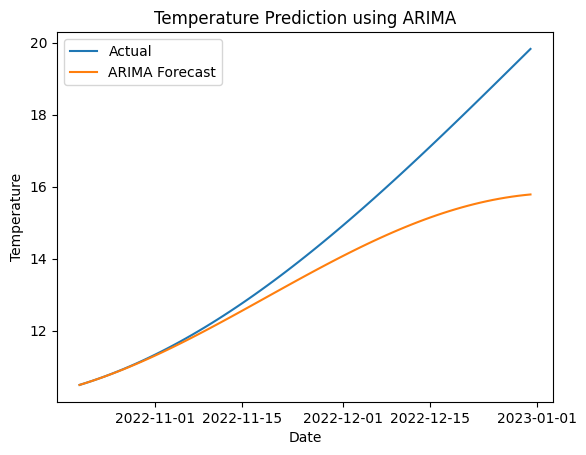

XGBoost Mean Squared Error: 26.094771761768516


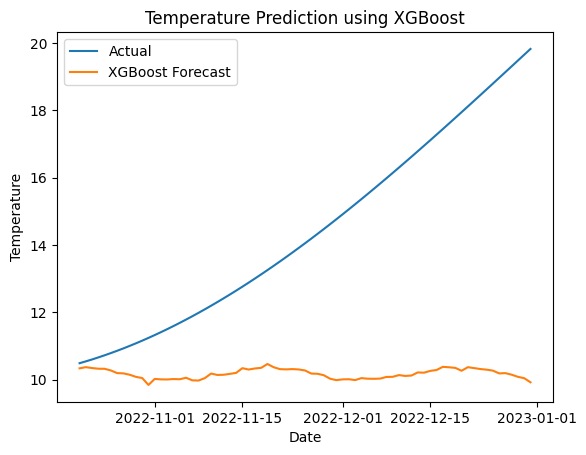

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# Create placeholder data for temperature prediction
date_rng = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
temperature_data = np.sin(np.arange(len(date_rng)) * 2 * np.pi / 365) * 10 + 20  # Sinusoidal temperature data

data = pd.DataFrame({'date': date_rng, 'temperature': temperature_data})

# Data preprocessing
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek

# Split data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# ARIMA Model
model_arima = ARIMA(train['temperature'], order=(5,1,0))
arima_model = model_arima.fit()

# Forecast
arima_forecast = arima_model.forecast(steps=len(test))

# Evaluate ARIMA model
mse_arima = mean_squared_error(test['temperature'], arima_forecast)
print(f'ARIMA Mean Squared Error: {mse_arima}')

# Plot ARIMA forecast
plt.plot(test['date'], test['temperature'], label='Actual')
plt.plot(test['date'], arima_forecast, label='ARIMA Forecast')
plt.title('Temperature Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# XGBoost Model
features = ['year', 'month', 'day', 'day_of_week']
target = 'temperature'

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

# Train XGBoost model
xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X_train, y_train)

# Forecast
xgboost_forecast = xgboost_model.predict(X_test)

# Evaluate XGBoost model
mse_xgboost = mean_squared_error(y_test, xgboost_forecast)
print(f'XGBoost Mean Squared Error: {mse_xgboost}')

# Plot XGBoost forecast
plt.plot(test['date'], y_test, label='Actual')
plt.plot(test['date'], xgboost_forecast, label='XGBoost Forecast')
plt.title('Temperature Prediction using XGBoost')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()
